** 스마트워치 센서 데이터 기반 행동 분류 1일차 **
# ---------- 미션2 : 행동분류 Feature 분석 ----------

### (0) 미션 이해하기
   * 이전 미션1 에서 센서에서 수집한 데이터로 6가지 행동을 분류할 수 있는 AI 모델을 만들어 보았습니다.
   * data 데이터프레임에서는 'activity'와 'subject' 열을 제외한 각 feature는 -1과 +1 사이의 실수로 되어 있는 데이터가 있습니다.
   * 미션2 에서는 스마트워치가 6가지 행동을 분류 하는데 어떤 feature가 영향을 많이 미치는지 모델링을 통해 중요도 상/하위 feature 들을 선별하고 해당 feature의 데이터 분포를 확인 하겠습니다.
   * 6가지 행동 패턴: STANDING, SITTING, LAYING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS


<span style="background-color:#fff5b1"><span style="color:black"><U>※ 미션완수 조건: 중요도 상위 5개 feature 를 선별하고 featuere 중요도 그래프를 그려 보세요<U></span></span>

<span style="background-color:#fff5b1"><span style="color:red"><U>※ 함수/변수명, 데이터 타입 잘 확인하고 코드를 작성하세요 <U></span></span>

---

### (1) 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> data 폴더 내 데이터 파일 확인 -> train_data.csv 불러오기 -> 'subject' 제거 -> 고유값(범주) 개수 시각화(수직막대 그래프)

In [176]:
# pandas, numpy, matplotlib.pyplot, seaborn, os 등 필요 라이브러리 호출

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os

* train 데이터 불러오기

In [177]:
# 현재 디렉토리 위치 확인
# 아래의 결과는 강사의 현재 위치(에이블러 별 다를 수 있음)

os.getcwd()

'c:\\Users\\User\\Desktop\\aivle\\3기 미프 3차 머신러닝\\강사용_DX 미프3차 전체(3.15-3.17)'

In [178]:
# 현재 디렉토리의 하위 data 폴더 내 파일 확인

os.listdir('./data/')

['features 설명.xlsx',
 'features.csv',
 'real_data.csv',
 'result3.csv',
 'result4.csv',
 'result5.csv',
 'test_data.csv',
 'train_data.csv']

In [179]:
# data 변수에 train_data.csv 파일을 불러와서 할당
# train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다.
# 잘 할당 되었는지 데이터 확인

data = pd.read_csv('./data/train_data.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


In [180]:
# data 변수(데이터프레임)에서 'subject'열 제거
# 'subject'열이 잘 제거 되었는지 확인


data.drop('subject', axis=True, inplace=True)
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.305772,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.622617,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.597610,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.196921,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,WALKING_UPSTAIRS


c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


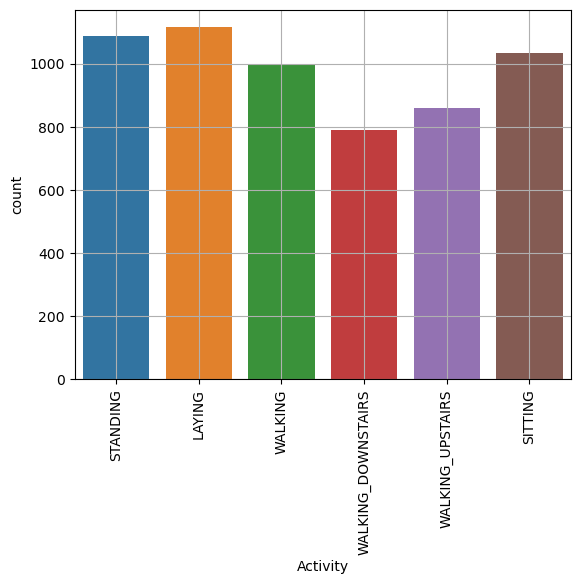

In [181]:
# seaborn 라이브러리의 countplot 함수을 사용하여 data['Activity'] 열의 범주별 개수 시각화 


sns.countplot(data['Activity'])
plt.xticks(rotation = 90)
plt.grid()
plt.show()


### (2) 행동패턴 예측 AI 모델링
* Random Forest 알고리즘을 사용하여 모델링을 실시 합니다.
* 학습 데이터는 data 데이터셋을 사용하고 target은  data['activity'] 입니다.
* 모델링이 완료되면 accuracy_score,confusion_matrix,classification_report 을 출력하세요.

	- 실습순서:AI 라이브러리 불러오기-> 데이터 나누기(x/y, 학습0.7:검증0.3) -> # 모델 초기화,학습,예측 -> 모델 평가

* AI 모델링 필요 라이브러리 호출

In [182]:
# 필요 AI 알고리즘 라이브러리 설치
# !pip install scikit-learn

from sklearn.model_selection import cross_val_score



In [183]:
# AI 모델은 sklearn.ensemble 라이브러리 RandomForestClassifier 알고리즘 불러오기
# 데이터를 나누기 위한 sklearn.model_selection 모듈의 train_test_split 함수 사용
# 모델 성능 평가를 위해 sklearn.metrics 모듈의 모든 클래스 사용


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *



* AI 모델링

In [184]:
# 모델 학습을 위한 데이터 나누기
# x, y 데이터 나누기 (target = 'Activity')
# 학습 데이터 분할 비율: 학습데이터 7 : 검증데이터 3
# random_state=2023

y = data['Activity']
x = data.drop('Activity', axis=1)
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.7,random_state=2023)




In [185]:
# 모델 선언, 학습, 예측
# AI모델 변수명: rf_model , 예측결과 변수명: rf_pred
# random_state=2023

rf_model = RandomForestClassifier(random_state=2023)

rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_val)
rf_pred

array(['WALKING', 'STANDING', 'LAYING', ..., 'WALKING', 'WALKING',
       'LAYING'], dtype=object)

* 모델 평가

In [186]:
# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print('accuracy_score: ',accuracy_score(y_val,rf_pred))

print('\n confusion_matrix: \n',confusion_matrix(y_val,rf_pred))

print('\n classification_report: \n',classification_report(y_val,rf_pred))

accuracy_score:  0.975070821529745

 confusion_matrix: 
 [[354   0   0   0   0   0]
 [  0 313  15   0   0   0]
 [  0  13 313   0   0   0]
 [  0   0   0 265   3   3]
 [  0   0   0   4 224   4]
 [  0   0   0   0   2 252]]

 classification_report: 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.96      0.95      0.96       328
          STANDING       0.95      0.96      0.96       326
           WALKING       0.99      0.98      0.98       271
WALKING_DOWNSTAIRS       0.98      0.97      0.97       232
  WALKING_UPSTAIRS       0.97      0.99      0.98       254

          accuracy                           0.98      1765
         macro avg       0.98      0.97      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



### (3) 변수별 중요도 추출 
* importance_data 데이터프레임 변수를 생성하여 feature_name 과 feature_importance 컬럼을 만들어 data 와 rf_model 에서 해당 데이터를 추가 하세요.
* importance_sort 데이터프레임 변수를 생성하여 importance_data 변수의 중요도(feature_importance)를 기준으로 내림차순 정렬된 값을 할당 하세요.
* 내림차순으로 정렬이 끝난 데이터셋을 수평막대 그래프로 시각화 하세요.





	- 실습순서: 중요도 데이터프레임 변수 생성 -> 'feature_name' 할당 -> 'feature_importance' 할당 -> 중요도 정렬 -> 인덱스 재설정 -> 중요도 별 시각화(수평막대 그래프)

* 중요도 데이터를 저장할 데이터 프레임 생성

In [187]:
# importance_data 판다스 데이터프레임 변수 생성 및 초기화


importance_data = pd.DataFrame()

In [188]:
# importance_data['feature_name'] 열에 모델링에서 사용한 x 컬럼명을 할당
importance_data['feature_name'] = x.columns


In [189]:
# importance_data['feature_importance'] 열에 모델링에서 사용한 모델의 feature_importances 를 할당
# 모델 feature_importances 확인법: feature_importances_ 함수 사용(ex: 모델명.feature_importances_)

importance_data['feature_importance'] = rf_model.feature_importances_

In [190]:
# importance_sort 데이터프레임 확인
importance_data

,feature_name,feature_importance
0,tBodyAcc-mean()-X,0.000372
1,tBodyAcc-mean()-Y,0.000443
2,tBodyAcc-mean()-Z,0.000226
3,tBodyAcc-std()-X,0.008804
4,tBodyAcc-std()-Y,0.000660
...,...,...
556,"angle(tBodyGyroMean,gravityMean)",0.000501
557,"angle(tBodyGyroJerkMean,gravityMean)",0.000505
558,"angle(X,gravityMean)",0.024125
559,"angle(Y,gravityMean)",0.027023


* 중요도 순으로 데이터 정렬

In [191]:
# importance_sort 변수를 생성하여 importance_data 변수를 'feature_importance' 순으로 내림차순 정열한 데이터를 할당 하세요(기준열='feature_importance', 내림차순)
# 참고함수: sort_values
# 파라미터: by='feature_importance', ascending=False, inplace=True
# 정렬 잘 되었나 확인

importance_sort = importance_data.sort_values(by='feature_importance', ascending=False)
importance_sort

,feature_name,feature_importance
52,tGravityAcc-min()-X,0.032845
49,tGravityAcc-max()-X,0.031726
56,tGravityAcc-energy()-X,0.030540
41,tGravityAcc-mean()-Y,0.027550
559,"angle(Y,gravityMean)",0.027023
...,...,...
506,fBodyAccMag-min(),0.000095
309,"fBodyAcc-bandsEnergy()-57,64",0.000094
217,tGravityAccMag-min(),0.000081
524,fBodyBodyAccJerkMag-maxInds,0.000074


In [192]:
# feature_importance 내림차순 때문에 엉킨 인덱스 재설정
# 참고함수: reset_index (위에서 부터 0 -> 아래로 갈수록 +1)
# 파라미터: inplace=True, drop=True
# 인덱스 설정이 잘 되었나 확인

importance_sort.reset_index(inplace=True, drop=True)
importance_sort

,feature_name,feature_importance
0,tGravityAcc-min()-X,0.032845
1,tGravityAcc-max()-X,0.031726
2,tGravityAcc-energy()-X,0.030540
3,tGravityAcc-mean()-Y,0.027550
4,"angle(Y,gravityMean)",0.027023
...,...,...
556,fBodyAccMag-min(),0.000095
557,"fBodyAcc-bandsEnergy()-57,64",0.000094
558,tGravityAccMag-min(),0.000081
559,fBodyBodyAccJerkMag-maxInds,0.000074


* 변수 별 중요도를 수평 그래프로 표현하기

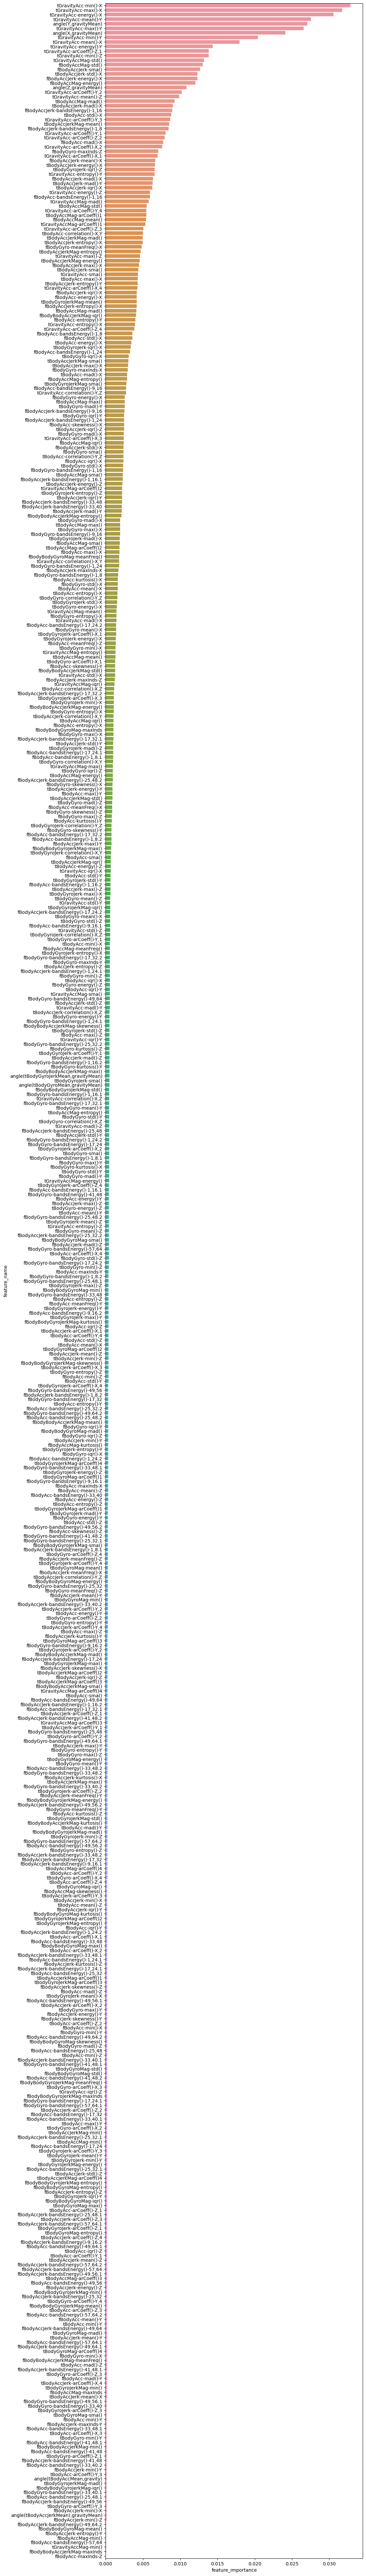

In [193]:

# 그래프 사이즈: (10,100)
# 참고 함수: sns.barplot
# 파라미터: x='feature_importance', y='feature_name', data = importance_sort
# x축/y축 label 설정할 것

plt.figure(figsize=(10,100))
sns.barplot(x='feature_importance', y='feature_name', data = importance_sort)
plt.xlabel('feature_importance')
plt.ylabel('feature_name')
plt.show()




### (4) 영향도 상위/하위 중요 feature 데이터 분석
* 행동 분류에 영향을 미치는 상위 feature 5개, 하위 feature 3개를 boxplot 그래프를 사용하여 값의 분포를 확인해 보세요.



	- 실습순서: 중요도 변수 상위 5행 확인 -> 상위 5개 feature 시각화(boxplot 그래프) -> 하위 3개 feature 시각화(boxplot 그래프)

In [194]:
# head 함수를 사용하여 중요도 상위 top 5 feature의 feature_name 과 feature_importance 확인
# 행동 분류에 영향을 미치는 중요도는 importance_sort 변수 참고

importance_sort.head()



,feature_name,feature_importance
0,tGravityAcc-min()-X,0.032845
1,tGravityAcc-max()-X,0.031726
2,tGravityAcc-energy()-X,0.030540
3,tGravityAcc-mean()-Y,0.027550
4,"angle(Y,gravityMean)",0.027023


* 상위 5개 feature 에 대한 분석

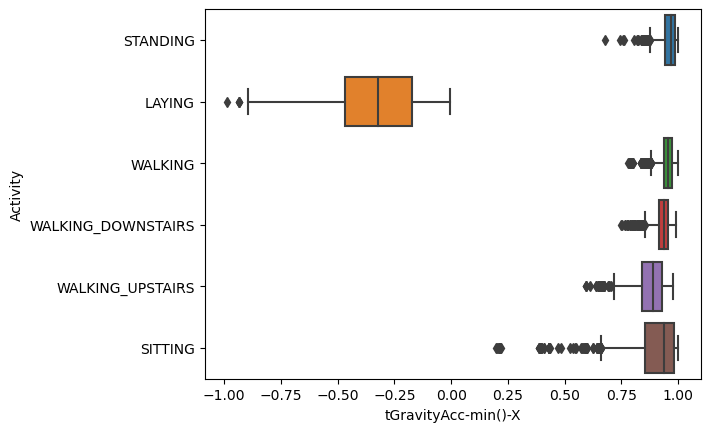

In [195]:
# 상위 1위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 상위 1위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data

f_name = 'tGravityAcc-min()-X'
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()

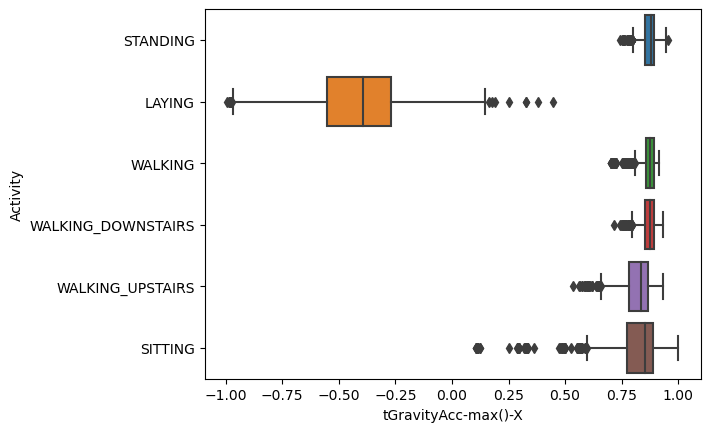

In [196]:
# 상위 2위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 상위 2위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data


f_name = 'tGravityAcc-max()-X'
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()


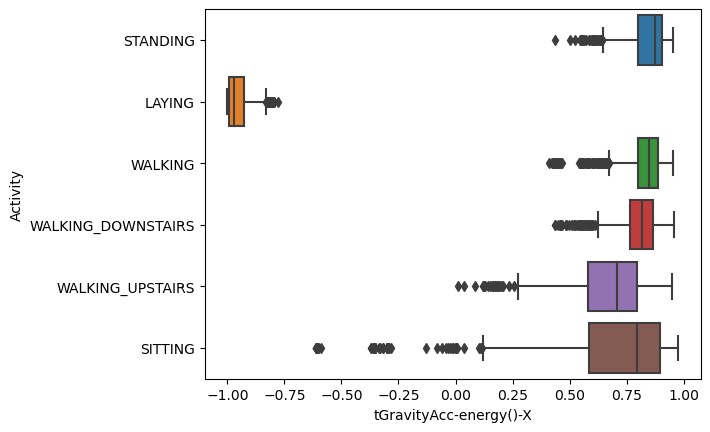

In [197]:
# 상위 3위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 상위 3위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data

f_name = importance_sort['feature_name'][2]
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()


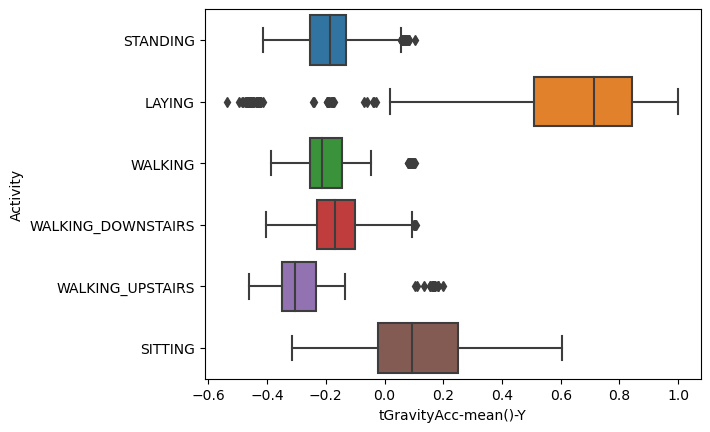

In [198]:
# 상위 4위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 상위 4위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data


f_name = importance_sort['feature_name'][3]
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()

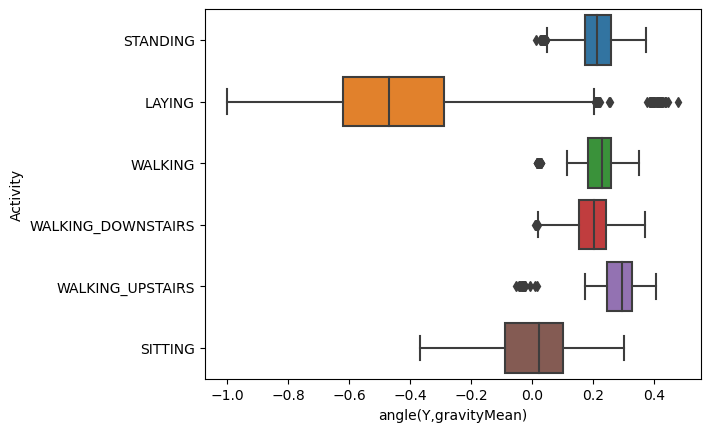

In [199]:
# 상위 5위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 상위 5위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data

f_name = importance_sort['feature_name'][4]
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()


* 하위 3개 feature 에 대한 분석

In [200]:
# 중요도 하위 top 3 변수명 확인
importance_sort.tail(3)



,feature_name,feature_importance
558,tGravityAccMag-min(),0.000081
559,fBodyBodyAccJerkMag-maxInds,0.000074
560,fBodyAcc-maxInds-Z,0.000040


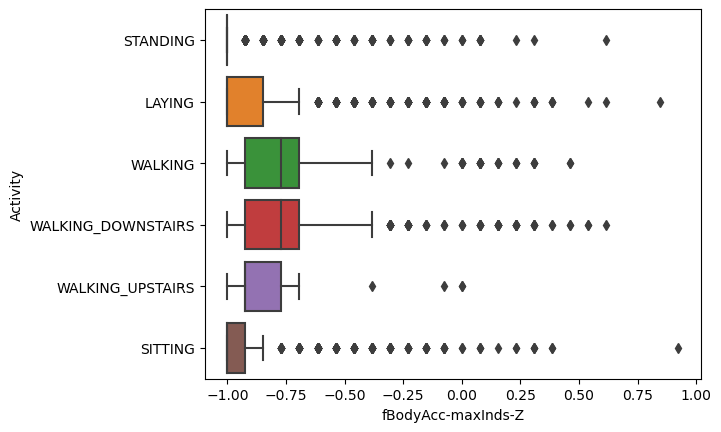

In [201]:
# 하위 1위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 하위 3위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data

f_name = importance_sort['feature_name'].iloc[-1]
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()


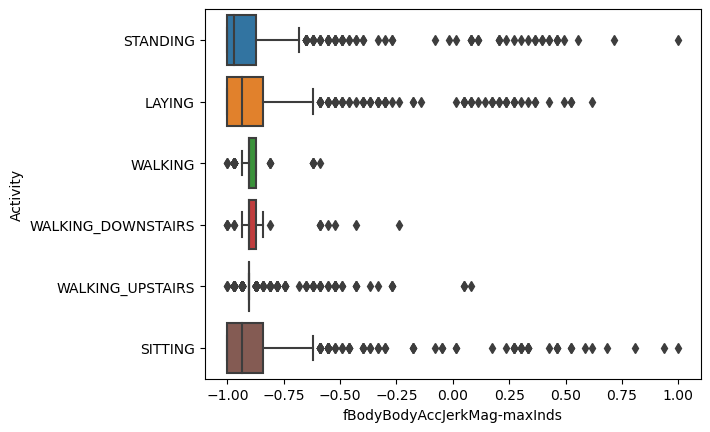

In [202]:
# 하위 2위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 하위 3위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data

f_name = importance_sort['feature_name'].iloc[-2]
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()


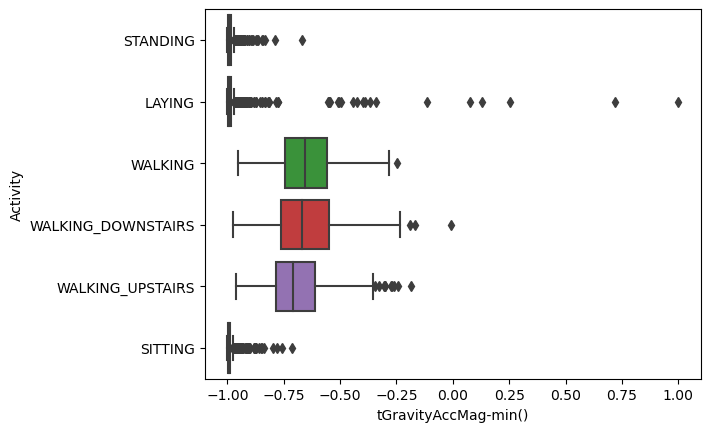

In [203]:
# 하위 3위 feature_name에 대한 BoxPlot 그래프 그리기
# f_name 변수를 생성하여 하위 3위 feature_name 할당
# 그래프 참고함수: sns.boxplot
# 파라미터: x=f_name, y='Activity', data=data	

f_name = importance_sort['feature_name'].iloc[-3]
sns.boxplot(x=f_name, y='Activity', data=data)
plt.show()


---
---


<span style="background-color:#fff5b1"><span style="color:black"><도전미션> 중요도 히스토그램을 그리는 것은 반복되는 작업 입니다. for 문을 사용하여 코드 한 셀에 하위 3개의 히스토그램이 그려질 수 있도록 코드를 작성해 보세요.</span></span>


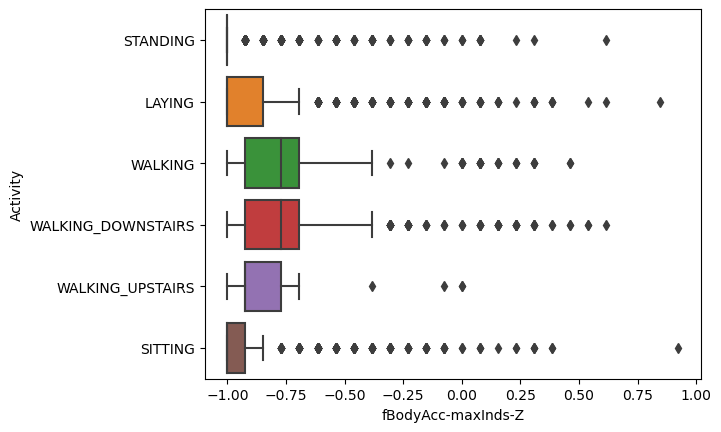

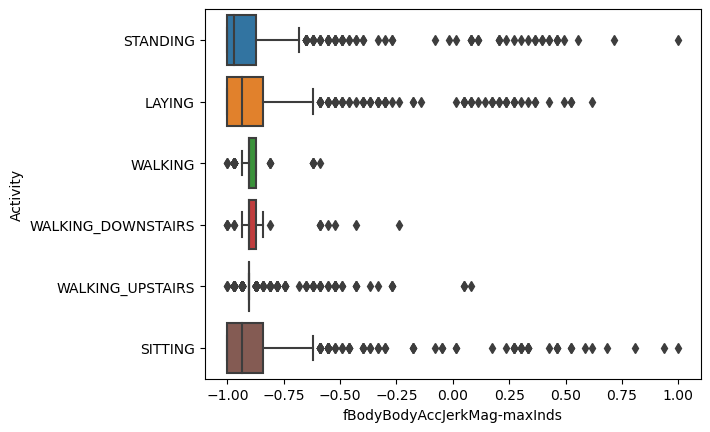

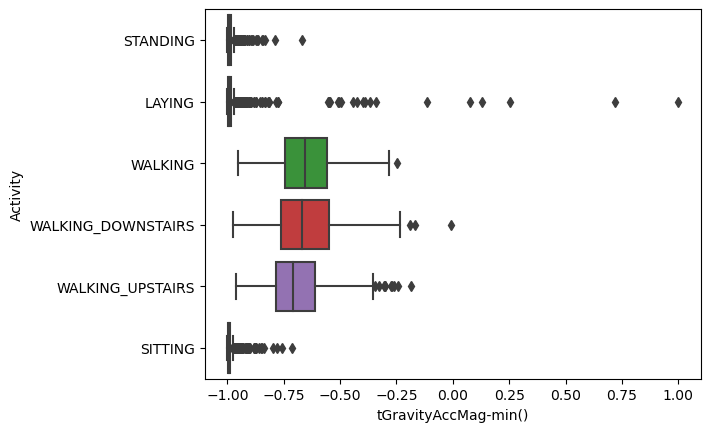

In [204]:
# for 문을 이용하여 하위 3개의 BoxPlot 그래프을 시각화

for i in range(-1,-4,-1):
    f_name = importance_sort['feature_name'].iloc[i]
    sns.boxplot(x=f_name, y='Activity', data=data)
    plt.show()


---
---

### (5) 각 센서의 중요도 분석
* features.csv 파일에는 train_data.csv 파일의 feature 정보가 담겨져 있습니다.
* 각각의 feature는 sensor -> agg -> axis 순서로 계층구조로 이루어져 있으며 컬럼명이 그룹으로 묶을 수 있습니다.
* feature 데이터와 importance_sort 데이터를 merge 하고 sensor 별 하위 계층을 그룹으로 묶어 중요도를 수평 그래프로 나타내세요. 

	- 실습순서: features.csv 불러오기 -> 데이터 merge -> 'sensor' 별 중요도 도출 -> 중요도 순으로 정렬 -> 센서별 중요도 시각화(수평막대 그래프)

* features 데이터셋 불러오기

In [205]:
# feature_group 변수를 생성하여 하위 data 폴더의 features.csv 데이터셋 할당
# 데이터가 잘 할당 되었나 features 데이터 확인

feature_group =pd.read_csv('./data/features.csv')
feature_group

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y
...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)"
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)"
558,angle,X,gravityMean,"angle(X,gravityMean)"
559,angle,Y,gravityMean,"angle(Y,gravityMean)"


* #### merge_df 데이터프레임 만들기

In [206]:
# importance_sort 데이터 확인

importance_sort

,feature_name,feature_importance
0,tGravityAcc-min()-X,0.032845
1,tGravityAcc-max()-X,0.031726
2,tGravityAcc-energy()-X,0.030540
3,tGravityAcc-mean()-Y,0.027550
4,"angle(Y,gravityMean)",0.027023
...,...,...
556,fBodyAccMag-min(),0.000095
557,"fBodyAcc-bandsEnergy()-57,64",0.000094
558,tGravityAccMag-min(),0.000081
559,fBodyBodyAccJerkMag-maxInds,0.000074


In [207]:
# merge_df 데이터프레임 변수 생성 및 초기화
# merge_df 변수에 feature_group 데이터프레임과 importance_sort 데이터프레임을 merge 하여 할당
# 데이터가 잘 할당 되었나 merge_df 데이터 확인

merge_df = pd.DataFrame()
merge_df = pd.merge(feature_group, importance_sort)
merge_df


,sensor,agg,axis,feature_name,feature_importance
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000372
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000443
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000226
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.008804
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000660
...,...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)",0.000501
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)",0.000505
558,angle,X,gravityMean,"angle(X,gravityMean)",0.024125
559,angle,Y,gravityMean,"angle(Y,gravityMean)",0.027023


* #### sensor 별 중요도 구하기

In [208]:
# sensor_sum 데이터프레임 변수 생성 및 초기화
# sensor_sum 변수를 생성하여 merge_df 변수를 'sensor' 컬럼으로 그룹화 하고 하위 feature의 'feature_importance' 데이터를 더함
# 참고함수: groupby, sum
# 잘 더해졌나 sensor_sum 데이터 확인


sensor_sum = merge_df.groupby(by='sensor')['feature_importance'].sum()
sensor_sum




sensor
angle                   0.063230
fBodyAcc                0.071299
fBodyAccJerk            0.105466
fBodyAccMag             0.045697
fBodyBodyAccJerkMag     0.011106
fBodyBodyGyroJerkMag    0.003777
fBodyBodyGyroMag        0.005638
fBodyGyro               0.074510
tBodyAcc                0.039238
tBodyAccJerk            0.074434
tBodyAccJerkMag         0.028790
tBodyAccMag             0.030752
tBodyGyro               0.032706
tBodyGyroJerk           0.033359
tBodyGyroJerkMag        0.009851
tBodyGyroMag            0.003034
tGravityAcc             0.347147
tGravityAccMag          0.033098
Name: feature_importance, dtype: float64

In [209]:
# sensor_sort 변수를 생성하여 sensor_sum 데이터를 'feature_importance' 기준으로 내림차순 정렬 후 할당
# 참고함수: sort_values
# 파라미터: ascending=False
# 잘 정렬 되었는지 sensor_sort 데이터 확인

sensor_sort = sensor_sum.sort_values(ascending=False)
sensor_sort

# sensor_sort가 데이터프레임 시
#sensor_sort = sensor_sum.sort_values(by='feature_importance', ascending=False)

sensor
tGravityAcc             0.347147
fBodyAccJerk            0.105466
fBodyGyro               0.074510
tBodyAccJerk            0.074434
fBodyAcc                0.071299
angle                   0.063230
fBodyAccMag             0.045697
tBodyAcc                0.039238
tBodyGyroJerk           0.033359
tGravityAccMag          0.033098
tBodyGyro               0.032706
tBodyAccMag             0.030752
tBodyAccJerkMag         0.028790
fBodyBodyAccJerkMag     0.011106
tBodyGyroJerkMag        0.009851
fBodyBodyGyroMag        0.005638
fBodyBodyGyroJerkMag    0.003777
tBodyGyroMag            0.003034
Name: feature_importance, dtype: float64

* #### sensor 별 중요도 시각화 하기

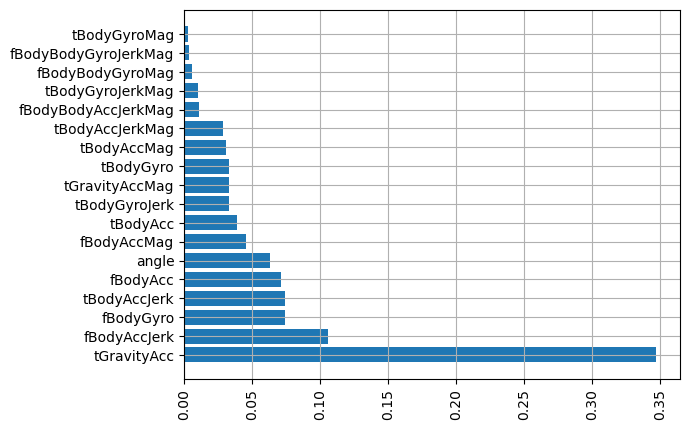

In [210]:
# pandas의 plot 함수을 사용하여 sensor 별 중요도 시각화
# 참고함수: barh

plt.barh(y=sensor_sort.index, width=sensor_sort)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

# sensor_sort가 데이터프레임 시
# plt.barh(y=sensor_sort.index, width='feature_importance', data = sensor_sort)
# plt.xticks(rotation = 90, )
# plt.grid()
# plt.show()

---
---

<span style="background-color:#fff5b1"><span style="color:black"><도전미션> 'sensor' 별(seaborn 사용), 'sensor + agg' 별, 'sensor 하위 agg 그룹의 누적' 그래프를 그려보세요. </span></span>

#### <도전미션1> sensor 별 중요도 시각화

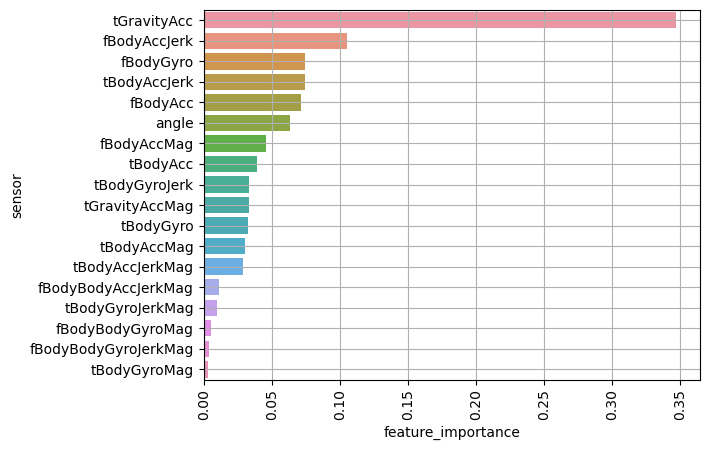

In [211]:
# seaborn 라이브러리 사용 sensor 별 중요도 시각화
# 참고함수: sns.barplot

sns.barplot(x=sensor_sort, y=sensor_sort.index, orient='h')
plt.xticks(rotation = 90)
plt.grid()
plt.show()


# sensor_sort가 데이터프레임 시
# sns.barplot(x=sensor_sort['feature_importance'], y=sensor_sort.index, orient='h')
# plt.xticks(rotation = 90, )
# plt.grid()
# plt.show()

#### <도전미션2> sensor + agg 별 상위 20 중요도 시각화

In [212]:
# sensor_agg_sum 변수에 merge_df 변수를 ['sensor','agg'] 컬럼으로 그룹화 하고 하위 feature의  'feature_importance' 데이터를 더함


sensor_agg_sum = merge_df.groupby(['sensor','agg'])['feature_importance'].sum()
sensor_agg_sum



sensor          agg             
angle           X                   0.024125
                Y                   0.027023
                Z                   0.010859
                tBodyAccJerkMean    0.000101
                tBodyAccMean        0.000116
                                      ...   
tGravityAccMag  max()               0.000978
                mean()              0.001474
                min()               0.000081
                sma()               0.000551
                std()               0.013211
Name: feature_importance, Length: 221, dtype: float64

In [213]:
# sensor_agg_sort 변수에 sensor_agg_sum  변수를 내림차순으로 정렬 후 할당

sensor_agg_sort = sensor_agg_sum.sort_values(ascending=False)
sensor_agg_sort

# sensor_agg_sort 변수를 데이터프레임으로 생성시
# sensor_agg_sort = sensor_agg_sum.sort_values(by='feature_importance', ascending=False)
# sensor_agg_sort


sensor               agg             
tGravityAcc          arCoeff()           0.084294
                     min()               0.067089
                     max()               0.062890
                     mean()              0.055343
                     energy()            0.050851
                                           ...   
angle                tBodyAccJerkMean    0.000101
fBodyBodyGyroMag     mean()              0.000096
fBodyAccMag          min()               0.000095
tGravityAccMag       min()               0.000081
fBodyBodyAccJerkMag  maxInds             0.000074
Name: feature_importance, Length: 221, dtype: float64

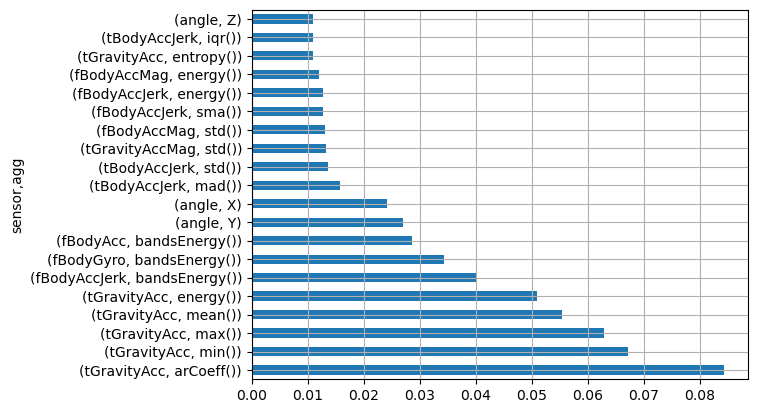

In [214]:
# pandas의 plot 함수을 사용하여 sensor_agg_sort를 sensor 별 중요도 상위 20개만 시각화
# 참고함수: 변수명.plot
# 파라미터: kind='barh'

sensor_agg_sort[:20].plot(kind='barh')
plt.grid()
plt.show()

#### <도전미션3> sensor 별 agg 중요도 누적 그래프 시각화

In [215]:
# acc변수에 sensor_agg_sort 변수의 'agg' 인덱스를 컬럼으로 변환(재구조화) 후 할당
# 참고함수: unstack()

acc = sensor_agg_sort.unstack()
acc



agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()2,arCoeff()3,arCoeff()4,bandsEnergy(),correlation(),...,mean(),meanFreq(),min(),skewness(),sma(),std(),tBodyAccJerkMean,tBodyAccMean,tBodyGyroJerkMean,tBodyGyroMean
sensor,,,,,,,,,,,,,,,,,,,,,
angle,0.024125,0.027023,0.010859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000101,0.000116,0.000505,0.000501
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028602,NaN,...,0.002100,0.002624,0.000707,0.004052,0.000696,0.004316,NaN,NaN,NaN,NaN
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039955,NaN,...,0.007326,0.000847,0.000321,0.000689,0.012678,0.003409,NaN,NaN,NaN,NaN
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005400,0.000579,0.000095,0.000227,0.001889,0.013009,NaN,NaN,NaN,NaN
fBodyBodyAccJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000345,0.000152,0.000131,0.000529,0.000265,0.001272,NaN,NaN,NaN,NaN
fBodyBodyGyroJerkMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000163,0.000191,0.000165,0.000370,0.000304,0.000498,NaN,NaN,NaN,NaN
fBodyBodyGyroMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000096,0.001832,0.000401,0.000200,0.000426,0.000193,NaN,NaN,NaN,NaN
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034353,NaN,...,0.002321,0.005375,0.000919,0.002584,0.002380,0.002537,NaN,NaN,NaN,NaN
tBodyAcc,NaN,NaN,NaN,0.002663,NaN,NaN,NaN,NaN,NaN,0.008541,...,0.001041,NaN,0.000942,NaN,0.000264,0.009772,NaN,NaN,NaN,NaN


In [216]:
# acc 변수에 acc['sort']열을 생성하여 각 센서 별 데이터 값을 더한 값을 할당(같은 행에 있는 값을 더해 주어야 하기때문에 axis=1 파라미터를 추가한다.)
# acc['sort']열을 내림차순으로 정렬
# 참고함수: sum(), sort_values()
# 합계 및 정렬 확인


acc['sort'] = acc.sum(axis=1)
acc.sort_values(by = 'sort', ascending = False, inplace=True)
acc


agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()2,arCoeff()3,arCoeff()4,bandsEnergy(),correlation(),...,meanFreq(),min(),skewness(),sma(),std(),tBodyAccJerkMean,tBodyAccMean,tBodyGyroJerkMean,tBodyGyroMean,sort
sensor,,,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,NaN,NaN,0.084294,NaN,NaN,NaN,NaN,NaN,0.005041,...,NaN,0.067089,NaN,0.004356,0.002485,NaN,NaN,NaN,NaN,0.347147
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039955,NaN,...,0.000847,0.000321,0.000689,0.012678,0.003409,NaN,NaN,NaN,NaN,0.105466
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034353,NaN,...,0.005375,0.000919,0.002584,0.002380,0.002537,NaN,NaN,NaN,NaN,0.074510
tBodyAccJerk,NaN,NaN,NaN,0.002948,NaN,NaN,NaN,NaN,NaN,0.001909,...,NaN,0.000938,NaN,0.004376,0.013524,NaN,NaN,NaN,NaN,0.074434
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028602,NaN,...,0.002624,0.000707,0.004052,0.000696,0.004316,NaN,NaN,NaN,NaN,0.071299
angle,0.024125,0.027023,0.010859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000101,0.000116,0.000505,0.000501,0.063230
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000579,0.000095,0.000227,0.001889,0.013009,NaN,NaN,NaN,NaN,0.045697
tBodyAcc,NaN,NaN,NaN,0.002663,NaN,NaN,NaN,NaN,NaN,0.008541,...,NaN,0.000942,NaN,0.000264,0.009772,NaN,NaN,NaN,NaN,0.039238
tBodyGyroJerk,NaN,NaN,NaN,0.005615,NaN,NaN,NaN,NaN,NaN,0.002141,...,NaN,0.001522,NaN,0.000501,0.002732,NaN,NaN,NaN,NaN,0.033359


In [217]:
# 정렬을 완료 했으므로 acc 변수에서 acc['sort']열 삭제
# 참고함수: drop()

acc.drop('sort', axis=1, inplace=True)
acc



agg,X,Y,Z,arCoeff(),arCoeff()1,arCoeff()2,arCoeff()3,arCoeff()4,bandsEnergy(),correlation(),...,mean(),meanFreq(),min(),skewness(),sma(),std(),tBodyAccJerkMean,tBodyAccMean,tBodyGyroJerkMean,tBodyGyroMean
sensor,,,,,,,,,,,,,,,,,,,,,
tGravityAcc,NaN,NaN,NaN,0.084294,NaN,NaN,NaN,NaN,NaN,0.005041,...,0.055343,NaN,0.067089,NaN,0.004356,0.002485,NaN,NaN,NaN,NaN
fBodyAccJerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039955,NaN,...,0.007326,0.000847,0.000321,0.000689,0.012678,0.003409,NaN,NaN,NaN,NaN
fBodyGyro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034353,NaN,...,0.002321,0.005375,0.000919,0.002584,0.002380,0.002537,NaN,NaN,NaN,NaN
tBodyAccJerk,NaN,NaN,NaN,0.002948,NaN,NaN,NaN,NaN,NaN,0.001909,...,0.000470,NaN,0.000938,NaN,0.004376,0.013524,NaN,NaN,NaN,NaN
fBodyAcc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028602,NaN,...,0.002100,0.002624,0.000707,0.004052,0.000696,0.004316,NaN,NaN,NaN,NaN
angle,0.024125,0.027023,0.010859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000101,0.000116,0.000505,0.000501
fBodyAccMag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005400,0.000579,0.000095,0.000227,0.001889,0.013009,NaN,NaN,NaN,NaN
tBodyAcc,NaN,NaN,NaN,0.002663,NaN,NaN,NaN,NaN,NaN,0.008541,...,0.001041,NaN,0.000942,NaN,0.000264,0.009772,NaN,NaN,NaN,NaN
tBodyGyroJerk,NaN,NaN,NaN,0.005615,NaN,NaN,NaN,NaN,NaN,0.002141,...,0.000831,NaN,0.001522,NaN,0.000501,0.002732,NaN,NaN,NaN,NaN


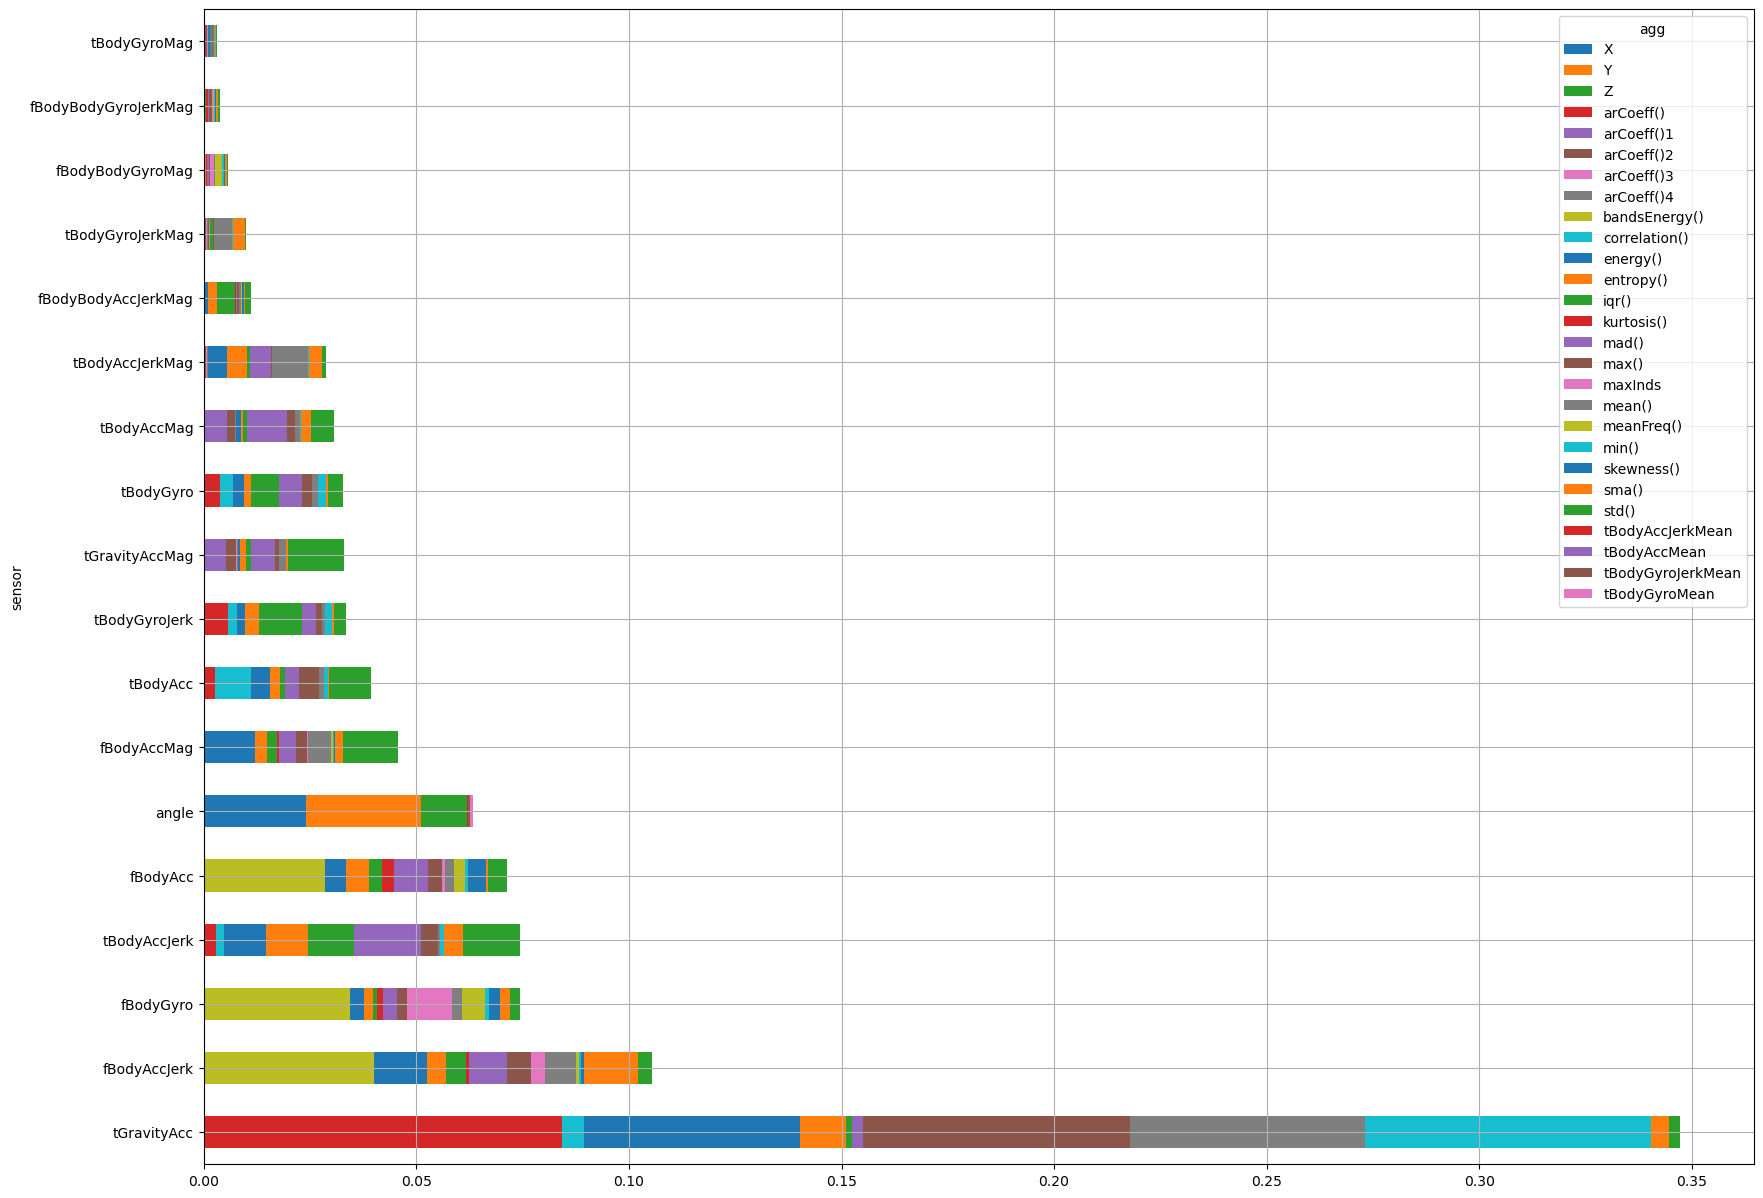

In [218]:
# pandas의 plot 함수을 사용하여 acc를 sensor 별 agg 누적 수평그래프로 시각화
# 참고함수: 변수명.plot
# 파라미터: kind='barh', stacked=True, figsize=(20,15)


acc.plot(kind='barh', stacked=True, figsize=(20,15))
plt.grid()
plt.show()




---
---